In [1]:
import requests # from urllib.request import urlopen
from bs4 import BeautifulSoup

import pandas as pd
from datetime import datetime
import time
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from collections import Counter
from matplotlib import font_manager, rc

In [2]:
company_df = pd.read_excel('result_191217_1440.xlsx')

In [3]:
for i in range(len(company_df['Industry'])):
    company_df['Industry'][i]=(str(company_df['Industry'][i]))
for i in range(len(company_df['Location'])):
    company_df['Location'][i]=(str(company_df['Location'][i]))

In [4]:
company_df['Industry'] = company_df['Industry'].apply(lambda x : "제조업" if "제조업" in x else x)
company_df['Industry'] = company_df['Industry'].apply(lambda x : "제조업" if "공급업" in x else x)
company_df['Industry'] = company_df['Industry'].apply(lambda x : "소프트웨어 개발" if "소프트웨어 개발" in x else x)
company_df['Industry'] = company_df['Industry'].apply(lambda x : "소프트웨어 개발" if "개발" in x else x)
company_df['Industry'] = company_df['Industry'].apply(lambda x : "소프트웨어 개발" if "웹" in x else x)
company_df['Industry'] = company_df['Industry'].apply(lambda x : "소프트웨어 개발" if "온라인" in x else x)
company_df['Industry'] = company_df['Industry'].apply(lambda x : "소프트웨어 개발" if "모바일" in x else x)
company_df['Industry'] = company_df['Industry'].apply(lambda x : "소프트웨어 개발" if "정보보안" in x else x)
company_df['Industry'] = company_df['Industry'].apply(lambda x : "소프트웨어 개발" if "지도제작업" in x else x)
company_df['Industry'] = company_df['Industry'].apply(lambda x : "소프트웨어 개발" if "네트워크" in x else x)
company_df['Industry'] = company_df['Industry'].apply(lambda x : "소프트웨어 개발" if "통신" in x else x)
company_df['Industry'] = company_df['Industry'].apply(lambda x : "소프트웨어 개발" if "쇼핑몰" in x else x)
company_df['Industry'] = company_df['Industry'].apply(lambda x : "솔루션·SI·CRM·ERP" if "포털" in x else x)
company_df['Industry'] = company_df['Industry'].apply(lambda x : "솔루션·SI·CRM·ERP" if "시스템" in x else x)
company_df['Industry'] = company_df['Industry'].apply(lambda x : "도매업" if "도매업" in x else x)
company_df['Industry'] = company_df['Industry'].apply(lambda x : "서비스업" if "서비스업" in x else x)
company_df['Industry'] = company_df['Industry'].apply(lambda x : "도매업" if "도매"in x else x)
company_df['Industry'] = company_df['Industry'].apply(lambda x : "도매업" if "소매"in x else x)
company_df['Industry'] = company_df['Industry'].apply(lambda x : "광고" if "광고"in x else x)
company_df['Industry'] = company_df['Industry'].apply(lambda x : "광고" if "출판"in x else x)
company_df['Industry'] = company_df['Industry'].apply(lambda x : "광고" if "디자인"in x else x)
company_df['Industry'] = company_df['Industry'].apply(lambda x : "전기·전자·제어" if "전자"in x else x)
company_df['Industry'] = company_df['Industry'].apply(lambda x : "제약·보건·바이오" if "의료"in x else x)
company_df['Industry'] = company_df['Industry'].apply(lambda x : "제약·보건·바이오" if "의학"in x else x)
company_df['Industry'] = company_df['Industry'].apply(lambda x : "서비스업" if "음식"in x else x)
company_df['Industry'] = company_df['Industry'].apply(lambda x : "서비스업" if "복지"in x else x)
company_df['Industry'] = company_df['Industry'].apply(lambda x : "기계·하드웨어" if "자동차"in x else x)
company_df['Industry'] = company_df['Industry'].apply(lambda x : "기계·하드웨어" if "반도체"in x else x)
company_df['Industry'] = company_df['Industry'].apply(lambda x : "기계·하드웨어" if "기계"in x else x)
company_df['Industry'] = company_df['Industry'].apply(lambda x : "건설·시공·토목·조경" if "건축"in x else x)
company_df['Industry'] = company_df['Industry'].apply(lambda x : "건설·시공·토목·조경" if "공사"in x else x)
company_df['Industry'] = company_df['Industry'].apply(lambda x : "부동산·중개·임대" if "부동산"in x else x)
company_df['Industry'] = company_df['Industry'].apply(lambda x : "부동산·중개·임대" if "중개"in x else x)
company_df['Industry'] = company_df['Industry'].apply(lambda x : "교육" if "교육"in x else x)
company_df['Industry'] = company_df['Industry'].apply(lambda x : "교육" if "학원"in x else x)
company_df['Industry'] = company_df['Industry'].apply(lambda x : "스포츠·여가·레저" if "여행"in x else x)

In [5]:
word_dic = {}

for word in company_df['Industry']:
    if word == "" or word == "nan":
        continue
    if word not in word_dic:
        word_dic[word] = 1 # changed from "0" to "1"
    else:
        word_dic[word] += 1
        
sorted_industry_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
sorted_industry_dic
industry_dic = {}
for i in range(14):
    industry_dic[sorted_industry_dic[i][0]] = sorted_industry_dic[i][1]

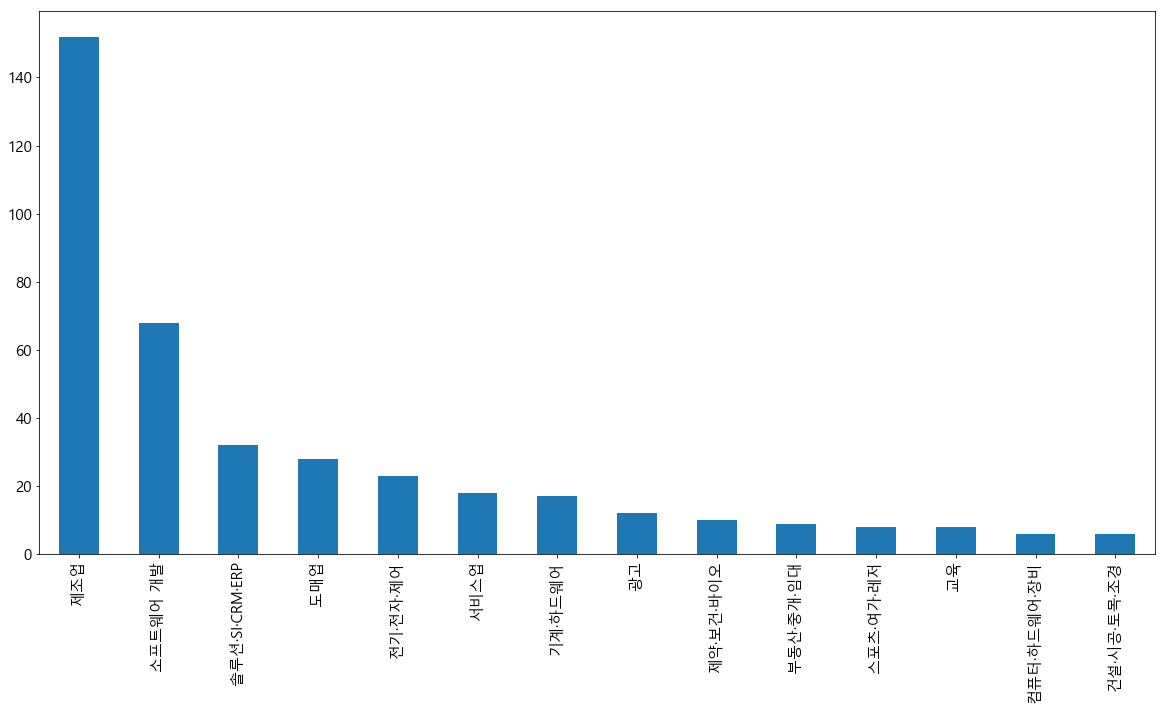

In [22]:
# 단어 빈도가 담긴 Dict 로부터 값을 가져와 DataFrame 을 만듭니다.
df = pd.DataFrame(list(industry_dic.values()), industry_dic.keys()) 

# 빈도 내림차순으로 정렬합니다.
result = df.sort_values([0], ascending=False)

# 전체 데이터(단어 수)는 너무 많기 때문에 출현 횟수 상위 50개만 가져와 시각화합니다.
result = result[:15]
# result

# 데이터프레임에 담긴 단어 및 빈도 수를 막대그래프로 표현하기 위한 코드입니다.

result.plot(kind="bar", legend=False, figsize=(20,10)) # 'bar' graph
# 그림 사이즈를 변경하고 싶을 경우 figsize=(가로, 세로) 를 변경합니다.
# 기타 그래프 관련 옵션은 https://goo.gl/YNejGt 에서 확인하고 적용하실 수 있습니다.
# matplotlib의 한글문제를 해결
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# font_name
rc('font', family=font_name, size = 30)
plt.show()

In [8]:
word_dic = {}


for word in company_df['Form']:
    if word == "" or word == "nan":
        continue
    if word not in word_dic:
        word_dic[word] = 1 # changed from "0" to "1"
    else:
        word_dic[word] += 1
        
sorted_form_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
del sorted_form_dic[10]

form_dic = {}
for i in range(14):
    form_dic[sorted_form_dic[i][0]] = sorted_form_dic[i][1]

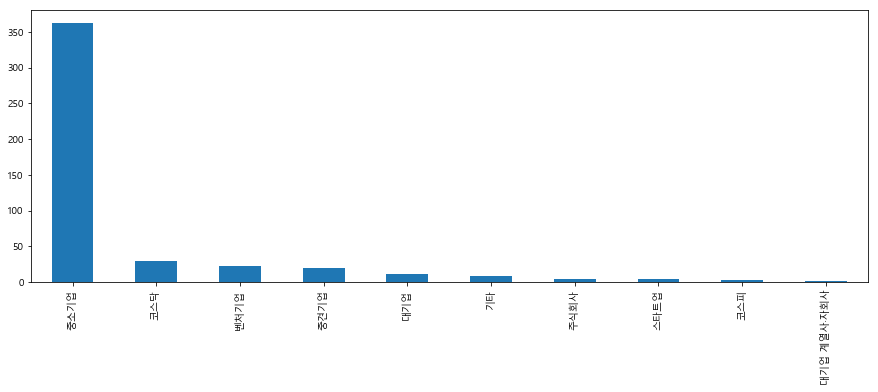

In [9]:
# 단어 빈도가 담긴 Dict 로부터 값을 가져와 DataFrame 을 만듭니다.
df = pd.DataFrame(list(form_dic.values()), form_dic.keys()) 

# 빈도 내림차순으로 정렬합니다.
result = df.sort_values([0], ascending=False)

# 전체 데이터(단어 수)는 너무 많기 때문에 출현 횟수 상위 50개만 가져와 시각화합니다.
result = result[:10]
# result

# 데이터프레임에 담긴 단어 및 빈도 수를 막대그래프로 표현하기 위한 코드입니다.

result.plot(kind="bar", legend=False, figsize=(15,5)) # 'bar' graph
# 그림 사이즈를 변경하고 싶을 경우 figsize=(가로, 세로) 를 변경합니다.
# 기타 그래프 관련 옵션은 https://goo.gl/YNejGt 에서 확인하고 적용하실 수 있습니다.
# matplotlib의 한글문제를 해결
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# font_name
rc('font', family=font_name)
plt.show()

In [10]:
word_dic = {}

company_df['Location'] = company_df['Location'].apply(lambda x : "서울" if "서울"in x else x)
company_df['Location'] = company_df['Location'].apply(lambda x : "경기" if "경기"in x else x)

for word in company_df['Location']:
    if word == "" or word == "nan" or word == "-":
        continue
    if word not in word_dic:
        word_dic[word] = 1 # changed from "0" to "1"
    else:
        word_dic[word] += 1
        
sorted_location_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
sorted_location_dic

[('서울', 246),
 ('경기', 159),
 ('대전', 18),
 ('인천', 9),
 ('부산', 8),
 ('대구', 8),
 ('경남', 5),
 ('충남', 3),
 ('광주', 3),
 ('울산', 3),
 ('전북', 2),
 ('충북', 2),
 ('강원', 2),
 ('경북', 1),
 ('전남', 1),
 ('세종', 1)]

In [11]:
company_df['Location']=company_df['Location'].apply(lambda x: '경기도' if '경기' in x else x)
company_df['Location']=company_df['Location'].apply(lambda x: '서울특별시' if '서울' in x else x)
company_df['Location']=company_df['Location'].apply(lambda x: '경상북도' if '경북' in x else x)
company_df['Location']=company_df['Location'].apply(lambda x: '경상남도' if '경남' in x else x)
company_df['Location']=company_df['Location'].apply(lambda x: '충청북도' if '충북' in x else x)
company_df['Location']=company_df['Location'].apply(lambda x: '충청남도' if '충남' in x else x)
company_df['Location']=company_df['Location'].apply(lambda x: '전라북도' if '전북' in x else x)
company_df['Location']=company_df['Location'].apply(lambda x: '전라남도' if '전남' in x else x)
company_df['Location']=company_df['Location'].apply(lambda x: '울산광역시' if '울산' in x else x)
company_df['Location']=company_df['Location'].apply(lambda x: '대전광역시' if '대전' in x else x)
company_df['Location']=company_df['Location'].apply(lambda x: '대구광역시' if '대구' in x else x)
company_df['Location']=company_df['Location'].apply(lambda x: '광주광역시' if '광주' in x else x)
company_df['Location']=company_df['Location'].apply(lambda x: '세종특별자치시' if '세종' in x else x)
company_df['Location']=company_df['Location'].apply(lambda x: '인천광역시' if '인천' in x else x)
company_df['Location']=company_df['Location'].apply(lambda x: '강원도' if '강원' in x else x)
company_df['Location']=company_df['Location'].apply(lambda x: '부산광역시' if '부산' in x else x)


company_df.head()

,Name,Industry,Form,Location
0,㈜에이치비테크놀러지,기계·하드웨어,중견기업,충청남도
1,㈜펨트론,제조업,중소기업,서울특별시
2,㈜이레정보기술,소프트웨어 개발,중소기업,서울특별시
3,㈜자비스,제조업,벤처기업,경기도
4,㈜싸인텔레콤,제조업,중소기업,경기도


In [12]:
word_dic = Counter(company_df['Location']) 


del word_dic['-']
del word_dic['nan']
word_dic

Counter({'충청남도': 3,
         '서울특별시': 246,
         '경기도': 159,
         '경상남도': 5,
         '대전광역시': 18,
         '인천광역시': 9,
         '광주광역시': 3,
         '부산광역시': 8,
         '전라북도': 2,
         '충청북도': 2,
         '울산광역시': 3,
         '대구광역시': 8,
         '강원도': 2,
         '경상북도': 1,
         '전라남도': 1,
         '세종특별자치시': 1})

In [13]:
ddf=pd.DataFrame(list(word_dic.items()),columns=['address','number'])

dfdf=pd.pivot_table(ddf,index='address',aggfunc=np.sum)

In [14]:
import folium
import json

rfile = 'skorea_provinces_geo_simple.json'
jsonData = json.load(open(rfile,encoding='utf-8'))


In [15]:
map = folium.Map(location=[36.4502, 127.502], zoom_start=6.5)
map.choropleth(geo_data=jsonData,data=dfdf['number'],columns = [dfdf.index, dfdf['number']],fill_color = 'BuPu', key_on = 'feature.properties.name')
map